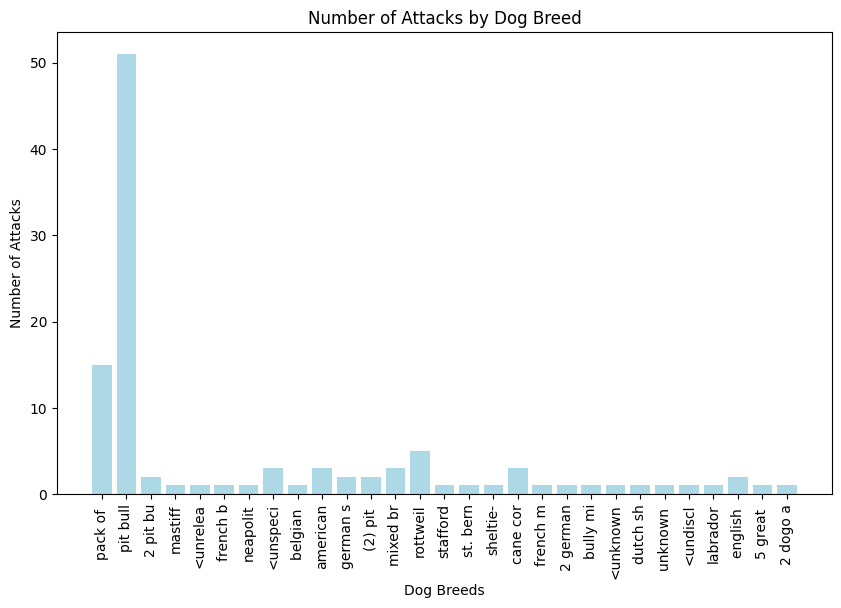

In [68]:
import csv
import matplotlib.pyplot as plt

filename = 'dog_attacks_students.csv'

with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

breed_counts = {}

for row in data:
    breed = row['dog_type'][:8].lower()
    if breed in breed_counts:
        breed_counts[breed] += 1
    else:
        breed_counts[breed] = 1

plt.figure(figsize = (10, 6))
plt.bar(breed_counts.keys(), breed_counts.values(), color='lightblue')
plt.xlabel('Dog Breeds')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Dog Breed')
plt.xticks(rotation = 90)
plt.show()

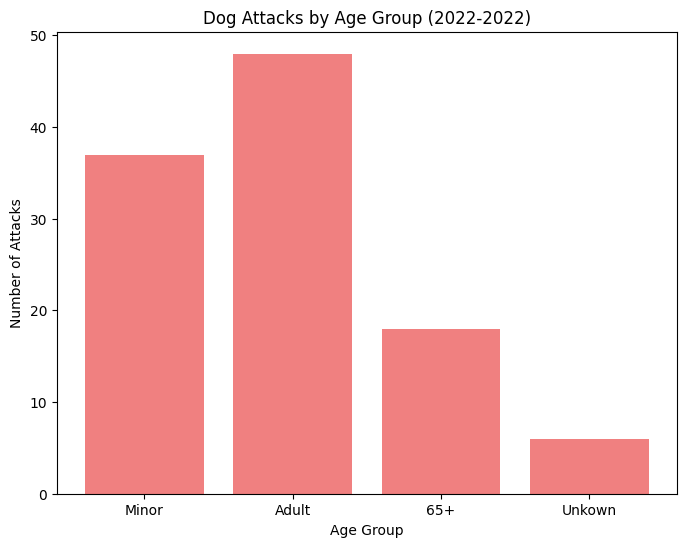

In [62]:
import csv
import matplotlib.pyplot as plt

filename = 'dog_attacks_students.csv'

with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

three_years = [row for row in data if 2020 <= int(row['year']) <= 2022]
def age_category(age):
    try:
        age = int(age.split()[0])
        if age <= 17:
            return 'Minor'
        elif 18 <= age <= 65:
            return 'Adult'
        else:
             return '65+'
    except ValueError:
        return 'Unkown'

age_group_counts = {'Minor': 0, 'Adult': 0, '65+': 0, 'Unkown': 0}
for attack in three_years:
    age_group = age_category(attack['vic_age'])
    age_group_counts[age_group] += 1

# print(three_years)
# print(f"Age: {attack['vic_age']}. Group: {age_group}")
# print(age_group_counts)

plt.figure(figsize=(8, 6))
plt.bar(age_group_counts.keys(), age_group_counts.values(), color = 'lightcoral')
plt.xlabel('Age Group')
plt.ylabel('Number of Attacks')
plt.title('Dog Attacks by Age Group (2022-2022)')
plt.show()


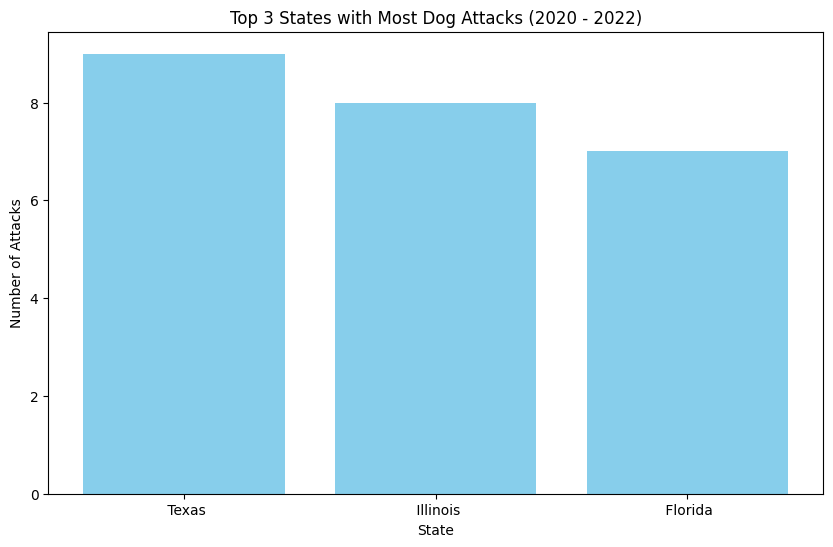

In [32]:
import csv 

import matplotlib.pyplot as plt

filename = 'dog_attacks_students.csv'
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

attacks_2020_to_2022 = []
for row in data:
    if 2020 <= int(row['year']) <= 2022:
        attacks_2020_to_2022.append(row)

state_counts = {}
for attack in attacks_2020_to_2022:
    state = attack['state']
    if state in state_counts:
        state_counts[state] += 1
    else:
        state_counts[state] =1 

top_states = sorted(state_counts.items(), key=lambda x: x[1], reverse=True)[:3]
top_states_names, top_states_counts = zip(*top_states)

plt.figure(figsize=(10,6))
plt.bar(top_states_names, top_states_counts, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Attacks')
plt.title('Top 3 States with Most Dog Attacks (2020 - 2022)')
plt.show()

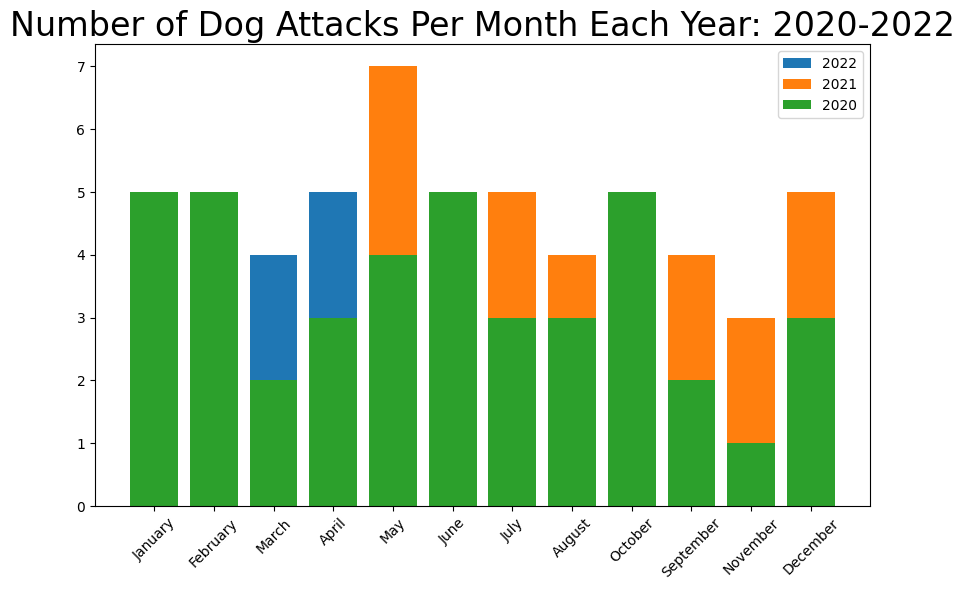

In [55]:
import csv

import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib import cm


filename = 'dog_attacks_students.csv'
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    attacks_per_month_year = defaultdict(dict)

    for row in reader:
        year = int(row['year'])
        month = row['date'].split()[0]
        attacks_per_month_year[year][month] = attacks_per_month_year[year].get(month, 0) + 1

plt.figure(figsize=(10,6))
for year, months in reversed(attacks_per_month_year.items()):
    plt.bar(months.keys(), months.values(), label=str(year))
plt.xticks(rotation=45)
plt.title(f'Number of Dog Attacks Per Month Each Year: {min(attacks_per_month_year.keys())}-{max(attacks_per_month_year.keys())}', fontsize=24)
plt.legend()
plt.show()
